## Bike sharing demand

In [1]:
from sklearn import model_selection, linear_model, metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
plt.style.use(['seaborn', 'seaborn-talk'])

warnings.filterwarnings('ignore')

### Загрузка данных

In [2]:
raw_data = pd.read_csv('bike_sharing_demand.csv', header=0, sep=',')

raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
print(raw_data.shape)
print(raw_data.isnull().values.any())

(10886, 12)
False


### Предобработка данных

#### Типы признаков

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 978.1+ KB


In [5]:
raw_data.datetime = raw_data.datetime.apply(pd.to_datetime)
raw_data['month'] = raw_data.datetime.apply(lambda x: x.month)
raw_data['hour'] = raw_data.datetime.apply(lambda x: x.hour)

raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


In [6]:
train_data = raw_data[:-1000]
hold_out_test_data = raw_data[-1000:]

print(raw_data.shape, train_data.shape, hold_out_test_data.shape)

print('train period from {} to {}'.format(train_data.datetime.min(), train_data.datetime.max()))
print('evaluation period from {} to {}'.format(hold_out_test_data.datetime.min(), hold_out_test_data.datetime.max()))

(10886, 14) (9886, 14) (1000, 14)
train period from 2011-01-01 00:00:00 to 2012-10-16 06:00:00
evaluation period from 2012-10-16 07:00:00 to 2012-12-19 23:00:00


In [7]:
# обучение
train_labels = train_data['count'].values
train_data = train_data.drop(['datetime', 'count'], axis=1)

# тест
test_labels = hold_out_test_data['count'].values
test_data = hold_out_test_data.drop(['datetime', 'count'], axis=1)

#### Целевая функция на обучении и отложенной выборке

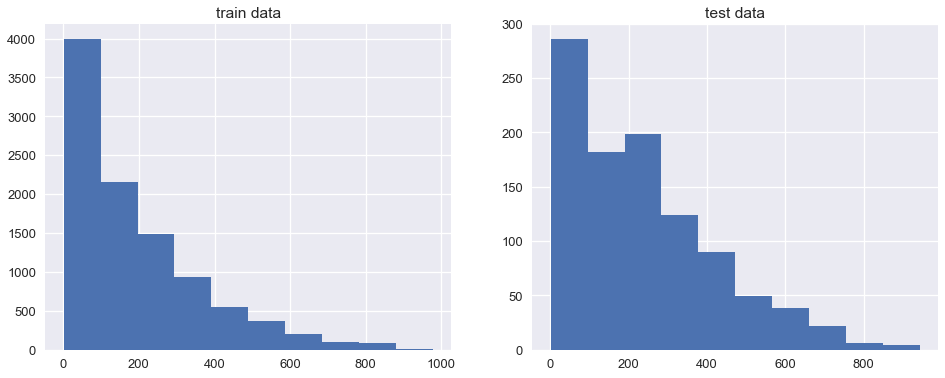

In [8]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(train_labels)
plt.title('train data')

plt.subplot(1, 2, 2)
plt.hist(test_labels)
plt.title('test data')

plt.show()

#### Численные признаки

In [9]:
numeric_column = ['temp', 'atemp', 'humidity', 'windspeed',
                  'casual', 'registered', 'month', 'hour']

train_data = train_data[numeric_column]
test_data = test_data[numeric_column]

### Модель

In [10]:
regressor = linear_model.SGDRegressor(random_state=0)
regressor.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [11]:
regressor.fit(train_data, train_labels)
print('Std')
print(metrics.mean_absolute_error(test_labels, regressor.predict(test_data)))

print('Test labels')
print(test_labels[:10])

print('Predict labels')
print(regressor.predict(test_data)[:10])

print('Coef')
print(regressor.coef_)

Std
11603765334974.1
Test labels
[525 835 355 222 228 325 328 308 346 446]
Predict labels
[-2.96250570e+13 -4.67602769e+13 -1.85477763e+13 -8.06623160e+12
 -8.91127091e+12 -1.37556428e+13 -1.41247099e+13 -1.09442370e+13
 -1.45166793e+13 -2.02285730e+13]
Coef
[-6.59188601e+10  1.56999831e+10  6.67973251e+08  2.99624888e+10
  2.38070539e+10 -5.84593436e+10  2.01286321e+10 -2.14872127e+10]


### Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaler.fit(train_data, train_labels)

scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [14]:
regressor.fit(scaled_train_data, train_labels)

print('Std')
print(metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data)))

print('Test labels')
print(test_labels[:10])

print('Predict labels')
print(regressor.predict(scaled_test_data)[:10])

print('Coef')
print(regressor.coef_)
print(*map(lambda x : round(x, 2), regressor.coef_))

Std
0.042930483012407976
Test labels
[525 835 355 222 228 325 328 308 346 446]
Predict labels
[524.90958201 834.88816062 354.94091402 221.96933203 227.95283001
 324.96044934 327.966113   307.98463956 345.96942383 445.96231877]
Coef
[ 4.58902678e-01 -4.51836158e-01  6.62608792e-04 -1.40703258e-02
  5.08590377e+01  1.48008168e+02 -1.32281341e-03  7.59230341e-03]
0.46 -0.45 0.0 -0.01 50.86 148.01 -0.0 0.01


In [15]:
a = train_data.registered + train_data.casual
print(np.all(a == train_labels))

True


In [16]:
train_data.drop(['registered', 'casual'], axis=1, inplace=True)
test_data.drop(['registered', 'casual'], axis=1, inplace=True)

In [17]:
scaler.fit(train_data, train_labels)

scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [18]:
regressor.fit(scaled_train_data, train_labels)

print('Std')
print(metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data)))

print('Test labels')
print(test_labels[:10])

print('Predict labels')
print(regressor.predict(scaled_test_data)[:10])

print('Coef')
print(regressor.coef_)
print(*map(lambda x : round(x, 2), regressor.coef_))

Std
121.8835371361759
Test labels
[525 835 355 222 228 325 328 308 346 446]
Predict labels
[129.85077191 151.17889998 193.33762641 222.67603091 240.57638599
 251.01130419 256.87285157 282.21391554 287.38738113 297.60744105]
Coef
[ 30.00743714  32.15063204 -42.27737422   3.77909816  12.70734945
  50.05870387]
30.01 32.15 -42.28 3.78 12.71 50.06


### Pipeline

In [19]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[('scaling', scaler),
                           ('regression', regressor)])

pipeline.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, pipeline.predict(test_data))

121.8835371361759

In [20]:
print(*pipeline.get_params().keys(), sep='\n')

memory
steps
verbose
scaling
regression
scaling__copy
scaling__with_mean
scaling__with_std
regression__alpha
regression__average
regression__early_stopping
regression__epsilon
regression__eta0
regression__fit_intercept
regression__l1_ratio
regression__learning_rate
regression__loss
regression__max_iter
regression__n_iter_no_change
regression__penalty
regression__power_t
regression__random_state
regression__shuffle
regression__tol
regression__validation_fraction
regression__verbose
regression__warm_start


In [21]:
parameters_grid = {
    'regression__loss' : ['huber', 'epsilon_insensitive', 'squared_loss', ],
    'regression__max_iter' : [3, 5, 10, 50],
    'regression__penalty' : ['l1', 'l2', 'none'],
    'regression__alpha' : [0.0001, 0.01],
    'scaling__with_mean' : [0., 0.5],
}

grid_cv =model_selection.GridSearchCV(pipeline, parameters_grid,
                                      scoring='neg_mean_absolute_error', cv=4)

In [22]:
%%time
grid_cv.fit(train_data, train_labels)

Wall time: 13.1 s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('regression',
                                        SGDRegressor(random_state=0))]),
             param_grid={'regression__alpha': [0.0001, 0.01],
                         'regression__loss': ['huber', 'epsilon_insensitive',
                                              'squared_loss'],
                         'regression__max_iter': [3, 5, 10, 50],
                         'regression__penalty': ['l1', 'l2', 'none'],
                         'scaling__with_mean': [0.0, 0.5]},
             scoring='neg_mean_absolute_error')

In [23]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-108.61772632999148
{'regression__alpha': 0.01, 'regression__loss': 'squared_loss', 'regression__max_iter': 3, 'regression__penalty': 'l2', 'scaling__with_mean': 0.0}


### Оценка по отложенному тесту

In [24]:
test_predictions  = grid_cv.best_estimator_.predict(test_data)

print('Mse', metrics.mean_absolute_error(test_labels, test_predictions ))
print('mean', np.mean(test_labels))

print('test\t', *test_labels[:10])
print('predict ', *(int(i) for i in test_predictions[:10]))

Mse 119.98978845935379
mean 232.159
test	 525 835 355 222 228 325 328 308 346 446
predict  139 159 207 237 257 267 272 297 304 313


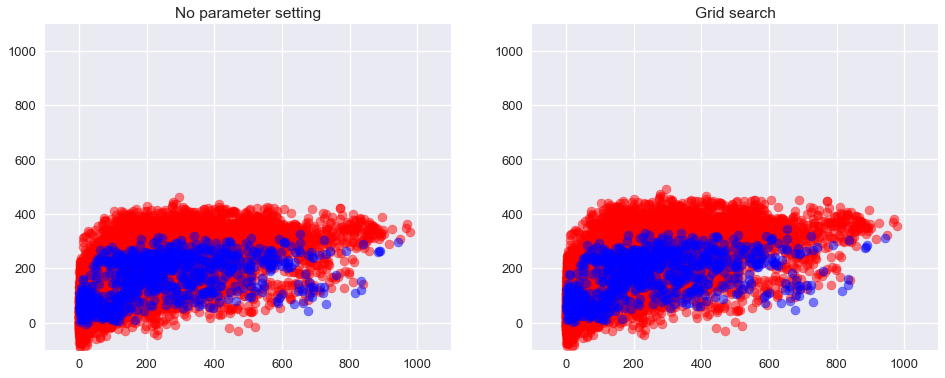

In [25]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(train_labels, pipeline.predict(train_data), alpha=0.5, color='red')
plt.scatter(test_labels, pipeline.predict(test_data), alpha=0.5, color='blue')
plt.title('No parameter setting')
plt.xlim(-100, 1100)
plt.ylim(-100, 1100)

plt.subplot(1, 2, 2)
plt.scatter(train_labels, grid_cv.best_estimator_.predict(train_data), alpha=0.5, color='red')
plt.scatter(test_labels, grid_cv.best_estimator_.predict(test_data), alpha=0.5, color='blue')
plt.title('Grid search')
plt.xlim(-100, 1100)
plt.ylim(-100, 1100)

plt.show()

## Часть 2

### Загрузка данных

In [26]:
raw_data = pd.read_csv('bike_sharing_demand.csv', header=0, sep=',')

raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Предобработка данных
#### Обучение и отложенный тест

In [27]:
raw_data.datetime = raw_data.datetime.apply(pd.to_datetime)
raw_data['month'] = raw_data.datetime.apply(lambda x: x.month)
raw_data['hour'] = raw_data.datetime.apply(lambda x: x.hour)

In [28]:
train_data = raw_data.iloc[:-1000, :]
hold_out_test_data = raw_data.iloc[-1000:, :]

print(raw_data.shape, train_data.shape, hold_out_test_data.shape)

(10886, 14) (9886, 14) (1000, 14)


In [29]:
# обучение
train_labels = train_data['count'].values
train_data = train_data.drop(['datetime', 'count', 'casual', 'registered'], axis = 1)

# тест
test_labels = hold_out_test_data['count'].values
test_data = hold_out_test_data.drop(['datetime', 'count', 'casual', 'registered'], axis = 1)

In [30]:
binary_data_columns = ['holiday', 'workingday']
binary_data_indices = np.array([(column in binary_data_columns) for column in train_data.columns], dtype = bool)
print(binary_data_columns)
print(binary_data_indices)

['holiday', 'workingday']
[False  True  True False False False False False False False]


In [31]:
categorical_data_columns = ['season', 'weather', 'month']
categorical_data_indices = np.array([(column in categorical_data_columns) for column in train_data.columns], dtype = bool)
print(categorical_data_columns)
print(categorical_data_indices)

['season', 'weather', 'month']
[ True False False  True False False False False  True False]


In [32]:
numeric_data_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'hour']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in train_data.columns], dtype = bool)
print(numeric_data_columns)
print(numeric_data_indices)

['temp', 'atemp', 'humidity', 'windspeed', 'hour']
[False False False False  True  True  True  True False  True]


### Pipeline

In [38]:
from sklearn import pipeline, preprocessing

regressor = linear_model.SGDRegressor(random_state=0, n_iter_no_change=3, loss='squared_loss', penalty='l2')

estimator = pipeline.Pipeline(steps = [
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data.iloc[:, binary_data_indices])),

            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data.iloc[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))
                        ])),

            #categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data.iloc[:, categorical_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))
                        ])),
        ])),
    ('model_fitting', regressor)
    ]
)

In [39]:
estimator.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, estimator.predict(test_data))

124.67230746253693

### Подбор параметров

In [40]:
for key in estimator.get_params():
    print(key)

memory
steps
verbose
feature_processing
model_fitting
feature_processing__n_jobs
feature_processing__transformer_list
feature_processing__transformer_weights
feature_processing__verbose
feature_processing__binary_variables_processing
feature_processing__numeric_variables_processing
feature_processing__categorical_variables_processing
feature_processing__binary_variables_processing__accept_sparse
feature_processing__binary_variables_processing__check_inverse
feature_processing__binary_variables_processing__func
feature_processing__binary_variables_processing__inv_kw_args
feature_processing__binary_variables_processing__inverse_func
feature_processing__binary_variables_processing__kw_args
feature_processing__binary_variables_processing__validate
feature_processing__numeric_variables_processing__memory
feature_processing__numeric_variables_processing__steps
feature_processing__numeric_variables_processing__verbose
feature_processing__numeric_variables_processing__selecting
feature_process

In [42]:
parameters_grid = {
    'model_fitting__alpha': [0.0001, 0.001, 0.01, 0.1, 0, 1],
    'model_fitting__eta0': [0.001, 0.05]
}

grid_cv = model_selection.GridSearchCV(estimator, parameters_grid,
                                       scoring='neg_mean_absolute_error', cv=4)

In [43]:
%%time
grid_cv.fit(train_data, train_labels)

print(grid_cv.best_score_)
print(grid_cv.best_params_)

-115.61504032477964
{'model_fitting__alpha': 0.1, 'model_fitting__eta0': 0.001}
Wall time: 2.45 s


## Оценка по отложенному тесту

In [50]:
test_predictions = grid_cv.best_estimator_.predict(test_data)
print('MSE', metrics.mean_absolute_error(test_labels, test_predictions))
print('Values ', *test_labels[:5])
print('Predict', *map(int, test_predictions[:5]))

MSE 124.1889174142851
Values  525 835 355 222 228
Predict 141 159 203 230 247


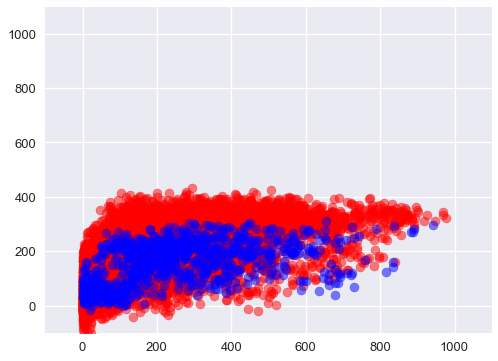

In [51]:
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.xlim(-100,1100)
plt.ylim(-100,1100)
plt.scatter(train_labels, grid_cv.best_estimator_.predict(train_data), alpha=0.5, color = 'red')
plt.scatter(test_labels, grid_cv.best_estimator_.predict(test_data), alpha=0.5, color = 'blue')

## Другая модель

In [60]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=0, max_depth=500, n_estimators=5000)

estimator = pipeline.Pipeline(steps = [
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data.iloc[:, binary_data_indices])),

            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data.iloc[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0, with_std = 1))
                        ])),

            #categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data.iloc[:, categorical_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))
                        ])),
        ])),
    ('model_fitting', regressor)
    ]
)

estimator.fit(train_data, train_labels)

MemoryError: could not allocate 786432 bytes

In [58]:
test_predictions = estimator.predict(test_data)
print('MSE', metrics.mean_absolute_error(test_labels, test_predictions))
print('Values ', *test_labels[:5])
print('Predict', *map(int, test_predictions[:5]))

MSE 79.6189075
Values  525 835 355 222 228
Predict 374 498 268 161 223


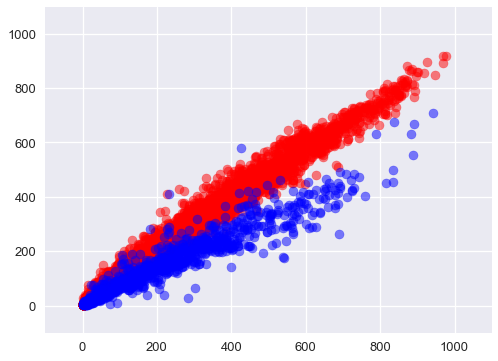

In [59]:
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.xlim(-100,1100)
plt.ylim(-100,1100)
plt.scatter(train_labels, estimator.predict(train_data), alpha=0.5, color = 'red')
plt.scatter(test_labels, estimator.predict(test_data), alpha=0.5, color = 'blue')

plt.show()